<b> pre-processing work of assi-1 req for this is here. assign-2 starts below this pre-processing <b>

In [1]:
#import any randoom dats set
import pandas as pd
df1=pd.read_csv("tested.csv")

In [2]:
#Preprocessing
print(df1['Age'].isnull().sum())  #86 null values
df1['Age'].fillna(value=df1['Age'].mean(), inplace=True)

#fare-- 1 null value
print(df1['Fare'].isnull().sum()) #1
df1['Fare'].fillna(value=df1['Fare'].mean(), inplace=True)


##Cabin          327
print(df1['Cabin'].isnull().sum()) #327
# we have to check what type of values thi column ishaving
print(df1['Cabin'].value_counts())
#as it is somewhat categorical natured value
#so let fill it with mode values
mode_cabin = df1['Cabin'].mode()[0]
df1['Cabin'].fillna(mode_cabin, inplace=True)

df1.isnull().sum()  #NO nulll values now

86
1
327
Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64


C:\Users\viren\AppData\Local\Temp\ipykernel_12448\2629898228.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(value=df1['Age'].mean(), inplace=True)
C:\Users\viren\AppData\Local\Temp\ipykernel_12448\2629898228.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [3]:
#remeive inconsistenv-cy in dataset if any present
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
#lets check column wise concistency
#PassengerId --  it is just  for identification pupose. alo it is not part of uor futher model as it doesent play any sigificant role on prediction.

#Survived	
print(df1['Survived'].value_counts())   #[0,1] value are present 
#so this is a binary  dateste which is like {died, survived  }  so  this is also a consistent data

#Pclass -- indicates passeneger class selected
print(df1['Pclass'].value_counts())     #[1,2,3]  these are three classses given for the column, also there is no anytoher vallue found outsied this range
#so Pclass is also consistent
#for assusrance we can check it 
df1 = df1[df1['Pclass'].isin([1, 2, 3])]  #  will Ensure no values outside the range of 1 to 3 exist.

#Age -- shows passengeers age
print(df1['Age'].describe())
#data  looks consistent as no -ve value of age , also max vallue of age is 76
#further we can check it in our boxplot ot detect any outlier present in this coulmn
#same obeserved for further columns also there is no inconsisctency

Survived
0    266
1    152
Name: count, dtype: int64
Pclass
3    218
1    107
2     93
Name: count, dtype: int64
count    418.000000
mean      30.272590
std       12.634534
min        0.170000
25%       23.000000
50%       30.272590
75%       35.750000
max       76.000000
Name: Age, dtype: float64


In [5]:
#OUTLIERS
#so ther are outliers in this 
# Remove rows where SibSp > 4
df1 = df1[df1['SibSp'] <= 4]

#same way for parch
# Remove rows where SibSp > 4 (if considered outliers)
df1 = df1[df1['Parch'] <= 4]


In [6]:
#fpr Fare column outliers

# Calculate Q1, Q3, and IQR
Q1 = df1['Fare'].quantile(0.25)
Q3 = df1['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to keep only values within the bounds
df1_cleaned = df1[(df1['Fare'] >= lower_bound) & (df1['Fare'] <= upper_bound)]

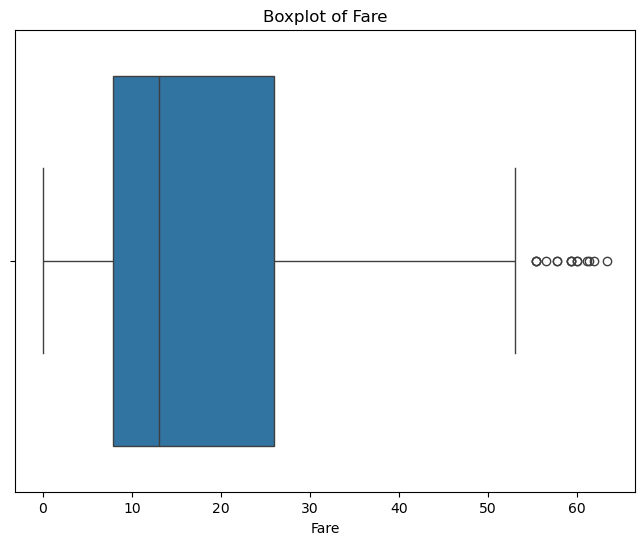

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.boxplot(x=df1_cleaned['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [9]:
df1_cleaned.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,1096.364146,0.338936,2.428571,28.728641,0.358543,0.260504,17.720443
std,121.116838,0.474012,0.755929,11.293532,0.699330,0.610703,13.653451
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,992.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.854200
50%,1096.000000,0.000000,3.000000,30.000000,0.000000,0.000000,13.000000
75%,1199.000000,1.000000,3.000000,31.000000,1.000000,0.000000,26.000000
max,1309.000000,1.000000,3.000000,64.000000,4.000000,4.000000,63.358300


# Assignment-2 actual tasks starts from here

In [26]:
#tasks
'''
1-Variance
2-Standard Deviation
3-Covariance
4-Correlation coefficient
5-Min max Normalization
6-Binning
7-Chi Square
'''

'\n1-Variance\n2-Standard Deviation\n3-Covariance\n4-Correlation coefficient\n5-Min max Normalization\n6-Binning\n7-Chi Square\n'

In [11]:
# 1-Variance
#created a seperate logic functionn for this
def variance(column):
    mean_val = column.mean()
    squared_diffs = (column - mean_val) ** 2
    var_value=squared_diffs.sum() / (len(column) - 1)
    return var_value
    

In [18]:
#lets check its result  y comparing built-in and our function call values
df1_cleaned['PassengerId'].var()   #14669.288373776477

#now our function
print("Variance column-wise")
print("PssengerId: ",variance(df1_cleaned['PassengerId'])) #14669.288373776477
#so same value function is working as we wanted

print("Survived: ",variance(df1_cleaned['Survived']))
print("Pclass	: ",variance(df1_cleaned['Pclass']))
print("Age: ",variance(df1_cleaned['Age']))
print("SibSp	: ",variance(df1_cleaned['SibSp']))
print("Parch: ",variance(df1_cleaned['Parch']))
print("Fare: ",variance(df1_cleaned['Fare']))

Variance column-wise
PssengerId:  14669.288373776477
Survived:  0.22468762786013283
Pclass	:  0.5714285714285715
Age:  127.54386263492741
SibSp	:  0.48906304094671577
Parch:  0.37295817203285814
Fare:  186.4167231566041


In [23]:
#2-Standard Deviation


#std_dev = variance ** 0.5

def std_dev(column):
    var1=variance(column)
    std_d = var1 ** 0.5
    return std_d

In [25]:
#lets check accuracy
df1_cleaned['Survived'].std()  #0.47401226551655
print(std_dev(df1_cleaned['Survived'])) #0.47401226551655057
#its workin well


print("Standard Deviation column-wise")

print("PssengerId: ",std_dev(df1_cleaned['PassengerId']))
print("Survived: ",std_dev(df1_cleaned['Survived']))
print("Pclass	: ",std_dev(df1_cleaned['Pclass']))
print("Age: ",std_dev(df1_cleaned['Age']))
print("SibSp	: ",std_dev(df1_cleaned['SibSp']))
print("Parch: ",std_dev(df1_cleaned['Parch']))
print("Fare: ",std_dev(df1_cleaned['Fare']))


0.47401226551655057
Standard Deviation column-wise
PssengerId:  121.11683769722721
Survived:  0.47401226551655057
Pclass	:  0.7559289460184545
Age:  11.293531893740214
SibSp	:  0.6993304232955376
Parch:  0.6107030145929019
Fare:  13.653450961445758


In [27]:
#3- Covarince
def covariance(col1, col2):
    mean_col1 = col1.mean()
    mean_col2 = col2.mean()
    cov = ((col1 - mean_col1) * (col2 - mean_col2)).sum() / (len(col1) - 1)
    return cov

print(covariance(df1_cleaned['Survived'],df1_cleaned['Age']))

-0.3772641514978808


In [28]:
#comment on it
'''Since the value is negative, it suggests an inverse relationship between Survived and Age.
This means older people tended to survive less compared to younger ones.
the magnitude (-0.377) is small, meaning the relationship is weak.
But ther is relationship in this is true. it may be due to child are balancing the old age people as they cant swim this may be the reasoon.
so we can say middle aged people have more chances of survival
'''

'Since the value is negative, it suggests an inverse relationship between Survived and Age.\nThis means older people tended to survive less compared to younger ones.\nthe magnitude (-0.377) is small, meaning the relationship is weak.\nBut ther is relationship in this is true. it may be due to child are balancing the old age people as they cant swim this may be the reasoon.\nso we can say middle aged people have more chances of survival\n'

In [29]:
#4-Correlation Coefficient Function
def correlation_coefficient(col1, col2):
    cov = covariance(col1, col2)
    std_col1 = std_dev(col1)  #used our above function
    std_col2 = std_dev(col2)  
    return cov / (std_col1 * std_col2)  # Pearson correlation formula
print("Correlation Coefficient of SURVIVED and AGE:", correlation_coefficient(df1_cleaned['Survived'],df1_cleaned['Age']))

Correlation Coefficient of SURVIVED and AGE: -0.07047355458325055


In [30]:
#same reason here also as in previous assignment we have seen there V/S graph has spike at middle

Text(0, 0.5, 'Frequency')

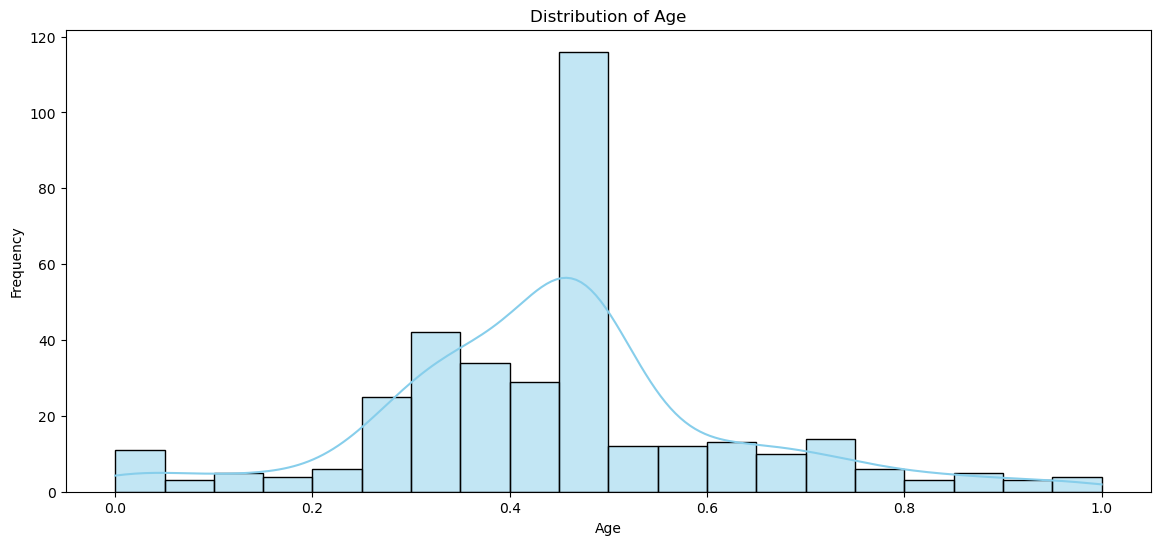

In [33]:
#5-Min max Normalization
import numpy as np
min1=np.min(df1_cleaned['Age'])
max1=np.max(df1_cleaned['Age'])

#min-max normalization
normalized_data=[( x- min1) / (max1- min1) for x in df1_cleaned['Age']]

plt.figure(figsize=(14, 6))
sns.histplot(normalized_data, kde=True, color='skyblue', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
                 